# A neural network for a classification with multiple labels

## import library

In [267]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm
import os
from tqdm import tqdm

## load data

In [268]:
directory_data  = './'
filename_data   = 'assignment_04_data.npz'
path_data       = os.path.join(directory_data, filename_data) 
data            = np.load(path_data)

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test  = np.asarray(x_test)
y_test  = np.asarray(y_test)

vec_x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vec_x_test  = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

In [269]:
print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('size of vector_x_train :', vec_x_train.shape)
print('size of vector_x_test :', vec_x_test.shape)
print('*************************************************')

*************************************************
size of x_train : (10000, 28, 28)
size of y_train : (10000, 5)
*************************************************
size of x_test : (4500, 28, 28)
size of y_test : (4500, 5)
*************************************************
size of vector_x_train : (10000, 784)
size of vector_x_test : (4500, 784)
*************************************************


## index for each class

In [270]:
number_class    = y_train.shape[1]
length_data     = vec_x_train.shape[1]

index_train = {}
index_test  = {}

number_index_train  = np.zeros(number_class)
number_index_test   = np.zeros(number_class)

for i in range(number_class):

    index_train[i]  = np.where(y_train[:, i] == 1)
    index_test[i]   = np.where(y_test[:, i] == 1)

    number_index_train[i]   = np.shape(index_train[i])[1]
    number_index_test[i]    = np.shape(index_test[i])[1]

In [271]:
print('*************************************************')
print('number of classes :', number_class)
print('length of data :', length_data)
print('*************************************************')
print('number of training images for each class :', number_index_train)
print('number of testing images for each class :', number_index_test)
print('*************************************************')

*************************************************
number of classes : 5
length of data : 784
*************************************************
number of training images for each class : [2000. 2000. 2000. 2000. 2000.]
number of testing images for each class : [900. 900. 900. 900. 900.]
*************************************************


## plot grey image

In [272]:
def plot_image(title, data):

    nRow = 2
    nCol = 4
    size = 3 
    
    fig, axes = plt.subplots(nRow, nCol, figsize=(size * nCol, size * nRow))
    fig.suptitle(title, fontsize=16)
    
    for i in range(nRow):
        for j in range(nCol):

            k = i * nCol + j
            axes[i, j].imshow(data[k], cmap='gray', vmin=0, vmax=1)

    plt.tight_layout()
    plt.show()

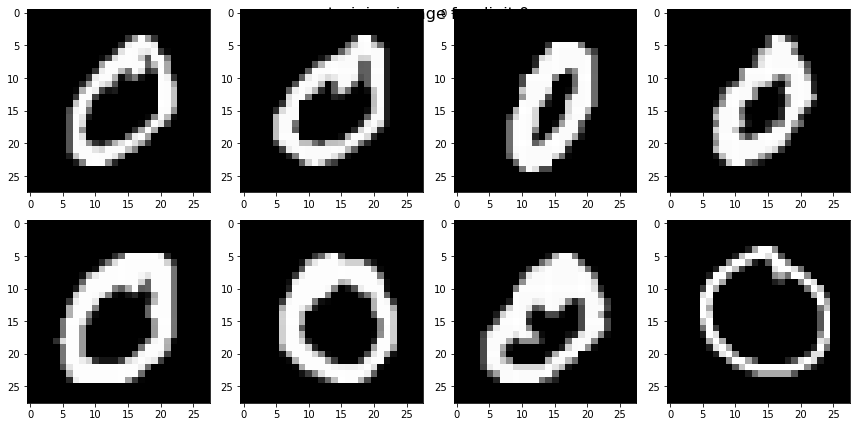

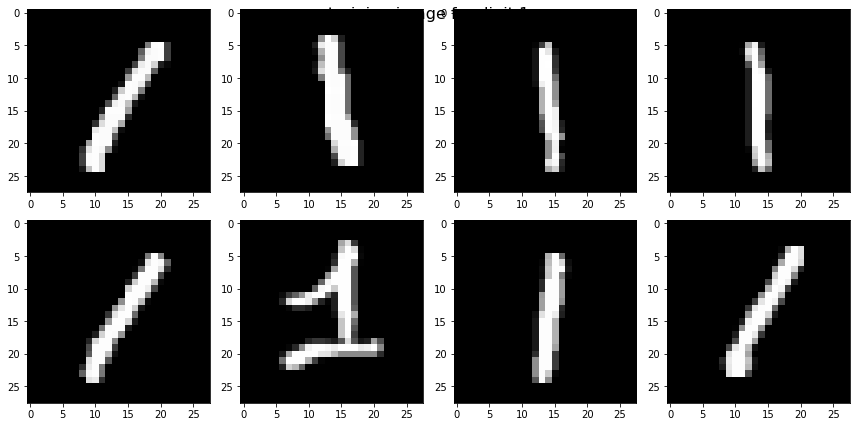

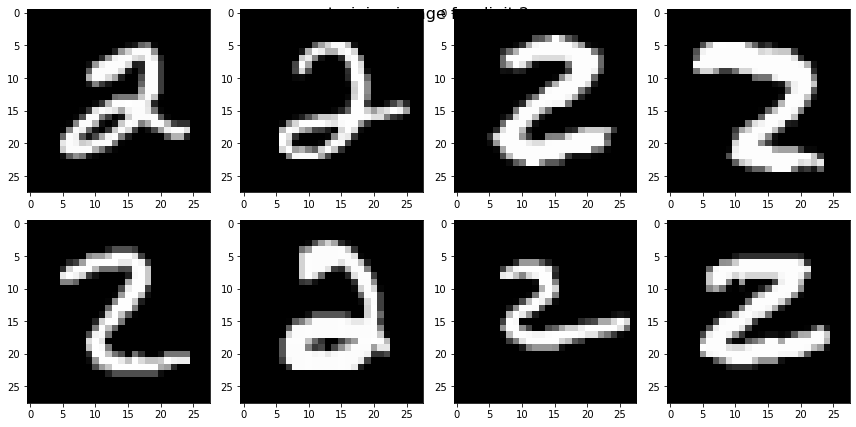

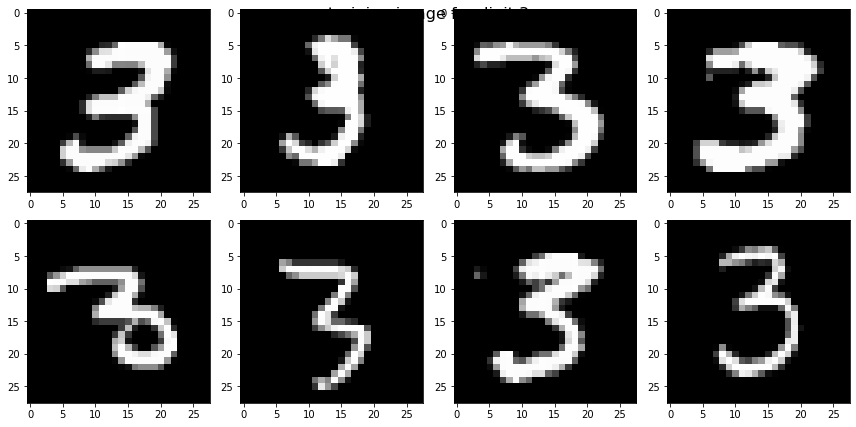

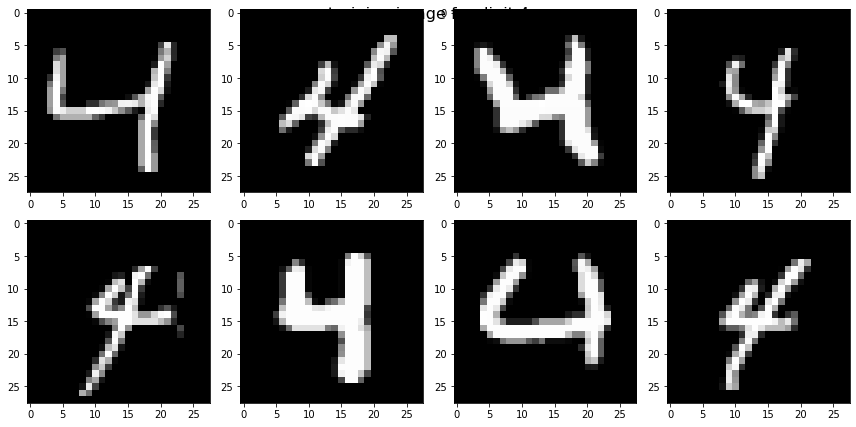

In [273]:
for c in range(number_class):

    index_class = c
    title       = 'training image for digit ' + str(index_class)
    plot_image(title, x_train[index_train[index_class][0]])

## initialize the neural network

- neural network consists of fullly connected linear layer followed by softmax activation function
- the size of the fully connected layer is input (length of data) and output (number of classes)

## initialize the weights for the fully connected layer

- create one matrix for the weights

In [274]:
size_input  = length_data 
size_output = number_class

weight = np.ones((size_input, size_output))

In [275]:
print('size of the weight :', weight.shape)

size of the weight : (784, 5)


## define neural network 

### define softmax function 

- input : number of data $\times$ number of classes
- output : number of data $\times$ number of classes

In [276]:
def activation_softmax(input):

# ================================================== 
# fill up the blank
#
    expmat=np.exp(input)    #밑이 e인 input mat  분자로 이용

    bot = np.sum(expmat,axis=1)
    bot = np.expand_dims(bot,axis=-1)

    one = np.ones((1,5))
    bot = bot@one
    #bot = np.repeat(bot,5,axis=1) #분모


    output = expmat/bot

#
# ================================================== 

    return output 

In [277]:

beta = np.array([[1,2,3],[7,10,100]])
beta = np.sum(beta,axis=1)
beta = np.expand_dims(beta, axis=1)
#beta = np.apply_along_axis(lambda a: np.sum(a),1, beta)
#beta=np.exp(beta)
##beta=beta.reshape(beta[0],10)
beta = np.repeat(beta,5,axis=1)
#beta = np.repeat(beta,2)
one = np.ones((10000,5))
print(one)
print("beta",beta,beta.shape)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 ...
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
beta [[  6   6   6   6   6]
 [117 117 117 117 117]] (2, 5)


### define the layer

- input : number of data $\times$ length of data
- weight : length of data $\times$ number of classes
- output : number of data $\times$  number of classes

In [278]:
def layer_fully_connected(input, weight):

# ================================================== 
# fill up the blank
#

    
    output = input@weight

#
# ================================================== 

    return output

## define forward propagation

- input : number of data $\times$ length of data
- weight : length of data $\times$ number of classes
- prediction : number of data $\times$  number of classes

In [279]:
def compute_prediction(input, weight):

# ================================================== 
# fill up the blank
#

    output = layer_fully_connected(input,weight) # 10000 * 5
    prediction = activation_softmax(output) # 10000 * 5

#
# ================================================== 
    
    return prediction 

## define the loss function

- cross entropy between the ground truth and the prediction
- cross entropy : $- \sum_k y_k \log(h_k)$
  - $y_k$ : $k$-th element in grount truth
  - $h_k$ : $k$-th element in prediction
- prediction : number of data $\times$  number of classes
- label : number of data $\times$  number of classes
- loss : number of data $\times$ 1 

In [280]:
def compute_loss(prediction, label):

# ================================================== 
# fill up the blank
#
    temp = -label*np.log(prediction)
    loss = np.sum(temp,axis=1)


#
# ================================================== 

    return loss

## compute the accuracy

- prediction : number of data $\times$  number of classes
- label : number of data $\times$  number of classes
- accuracy : scalar
- note that iterations over the input data are not allowed inside the function

In [281]:
def compute_accuracy(prediction, label):

# ================================================== 
# fill up the blank
#
    prediction = np.apply_along_axis(lambda a: np.argmax(a), 1, prediction)
    label = np.apply_along_axis(lambda a: np.argmax(a), 1, label)
    ans = np.where(label==temp,1,0)
    #arc = np.sum(ans)/len(y)
    accuracy =  np.sum(ans)/len(label)

#
# ================================================== 

    return accuracy

In [282]:
t1=np.array([[1,3,10,5,7],[9,8,7,6,15],[99,1,2,3,4]])
y=np.array([[0,0,1,0,0],[0,0,0,0,1],[0,1,0,0,0]])

temp = t1
temp = np.apply_along_axis(lambda a: np.argmax(a), 1, temp)
print(temp,"temp")
y=np.apply_along_axis(lambda a: np.argmax(a), 1, y)
print(y)

#print(np.apply_along_axis(lambda a: np.argmax(a), 1, temp))
#print(np.apply_along_axis(lambda a: np.argmax(a), 1, y))
ans = np.where(y==temp,1,0)
arc = np.sum(ans)/len(y)
print(ans,arc)

[2 4 0] temp
[2 4 1]
[1 1 0] 0.6666666666666666


## compute the gradient with respect to the weights

- note that iterations over the input data are not allowed inside the function
- input : number of data $\times$ length of data
- label : number of data $\times$ number of classes
- prediction : number of data $\times$  number of classes
- gradient : length of data $\times$ number of classes

In [283]:
def compute_gradient_weight(input, label, prediction):

# ================================================== 
# fill up the blank
#
    residual = prediction - label     #res = 10000 x 5
    residual = np.expand_dims(residual, axis=1)  #res = 10000 x 1  x5

    input = np.expand_dims(input, axis=2)   #input 10000x784x1

    

    gradient = input*residual   #10000x 784x 1  10000X1x 5
    gradient = np.mean(gradient,axis =0)   #1x784x5
    gradient = np.squeeze(gradient)

#
# ================================================== 

    return gradient

## gradient descent algorithm

- hyper-parameters

In [284]:
number_iteration    = 1000
learning_rate       = 0.05
weight              = weight * 0.001

## variables for storing intermediate results

In [285]:
accuracy_train  = np.zeros(number_iteration)
accuracy_test   = np.zeros(number_iteration)

loss_train_mean = np.zeros(number_iteration)
loss_train_std  = np.zeros(number_iteration)
loss_test_mean  = np.zeros(number_iteration)
loss_test_std   = np.zeros(number_iteration)

prediction_train_mean = np.zeros((number_class, number_iteration))
prediction_test_mean  = np.zeros((number_class, number_iteration))

## run the gradient descent algorithm

In [286]:
for i in tqdm(range(number_iteration)):

# ================================================== 
# fill up the blank
#
    pred_train_0 = compute_prediction(vec_x_train,weight)
    loss_train_0 = compute_loss(pred_train_0, y_train)
    grad_train  = compute_gradient_weight(vec_x_train, y_train, pred_train_0)
    
    weight  = weight - learning_rate*grad_train

    pred_test_0 = compute_prediction(vec_x_test,weight)
    loss_test_0 = compute_loss(pred_test_0, y_test)

    train0 = np.mean(pred_train_0[0:2000,:],axis=0)[0]
    train1 =np.mean(pred_train_0[2000:4000],axis=0)[1]
    train2 = np.mean(pred_train_0[4000:6000],axis=0)[2]
    train3 =np.mean(pred_train_0[6000:8000],axis=0)[3]
    train4 = np.mean(pred_train_0[8000:10000],axis=0)[4]

    test0 = np.mean(pred_test_0[0:900],axis=0)[0]
    test1 =np.mean(pred_test_0[900:1800],axis=0)[1]
    test2 = np.mean(pred_test_0[1800:2700],axis=0)[2]
    test3 =np.mean(pred_test_0[2700:3600],axis=0)[3]
    test4 = np.mean(pred_test_0[3600:4500],axis=0)[4]

    train_arr = [train0,train1,train2,train3,train4]
    test_arr = [test0,test1,test2,test3,test4]
    


#
# ================================================== 

    accuracy_train[i]   = compute_accuracy(pred_test_0,y_train)
    accuracy_test[i]    = compute_accuracy(pred_test_0,y_test )
    
    loss_train_mean[i]  = np.mean(loss_train_0)
    loss_train_std[i]   = np.std(loss_train_0)
    loss_test_mean[i]   = np.mean(loss_test_0)
    loss_test_std[i]    = np.std(loss_test_0)

    for c in range(number_class):

       prediction_train_mean[c, i]   = train_arr[c]
       prediction_test_mean[c, i]    = test_arr[c]

  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
100%|██████████| 1000/1000 [07:38<00:00,  2.18it/s]


---

## functions for presenting the results

---

In [299]:
def function_result_01():

    title           = 'loss (training)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'loss'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(loss_train_mean)), loss_train_mean, '-', color = color_mean)
    plt.fill_between(range(len(loss_train_mean)), loss_train_mean - loss_train_std, loss_train_mean + loss_train_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [300]:
def function_result_02():

    title           = 'loss (testing)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'loss'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(loss_test_mean)), loss_test_mean, '-', color = color_mean)
    plt.fill_between(range(len(loss_test_mean)), loss_test_mean - loss_test_std, loss_test_mean + loss_test_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [301]:
def function_result_03():

    title           = 'accuracy (training)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'accuracy'

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(accuracy_train)), accuracy_train, '-', color = 'red')
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [302]:
def function_result_04():

    title           = 'accuracy (testing)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'accuracy'

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(accuracy_test)), accuracy_test, '-', color = 'red')
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [303]:
def function_result_05():
    
    title           = 'prediction (training)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'

    plt.figure(figsize=(8, 6))
    plt.title(title)

    for c in range(number_class):

        plt.plot(prediction_train_mean[c], '-', label=str(c))
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [304]:
def function_result_06():
    
    title           = 'prediction (testing)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'

    plt.figure(figsize=(8, 6))
    plt.title(title)

    for c in range(number_class):

        plt.plot(prediction_test_mean[c], '-', label=str(c))
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [305]:
def function_result_07():

    print('final training loss = %6.5f' % (loss_train_mean[-1]))

In [306]:
def function_result_08():

    print('final testing loss = %6.5f' % (loss_test_mean[-1]))

In [307]:
def function_result_09():

    print('final training accuracy = %6.5f' % (accuracy_train[-1]))

In [308]:
def function_result_10():

    print('final testing accuracy = %6.5f' % (accuracy_test[-1]))

---

## results 

---


################################################################################
#
# RESULT # 01
#
################################################################################



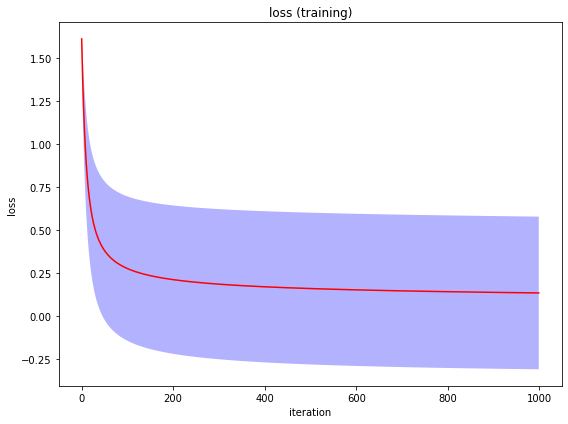


################################################################################
#
# RESULT # 02
#
################################################################################



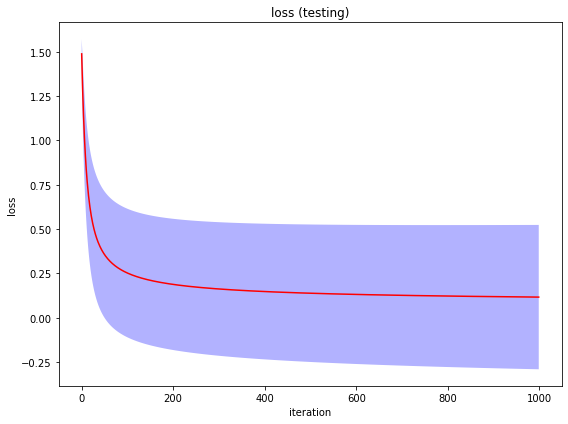


################################################################################
#
# RESULT # 03
#
################################################################################



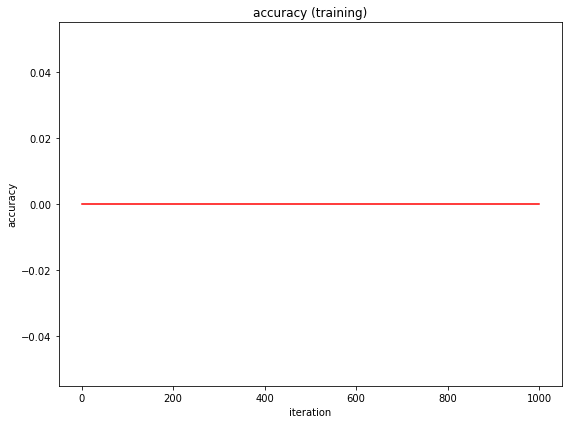


################################################################################
#
# RESULT # 04
#
################################################################################



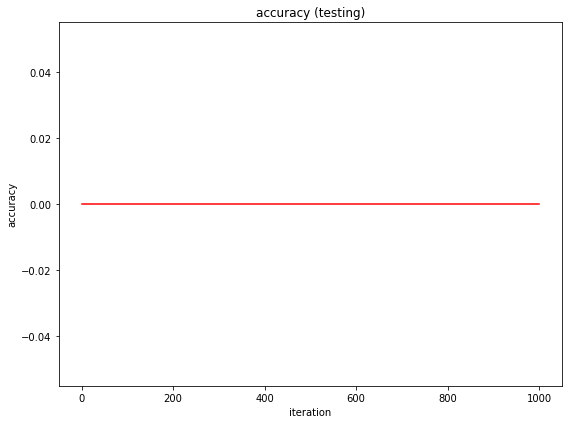


################################################################################
#
# RESULT # 05
#
################################################################################



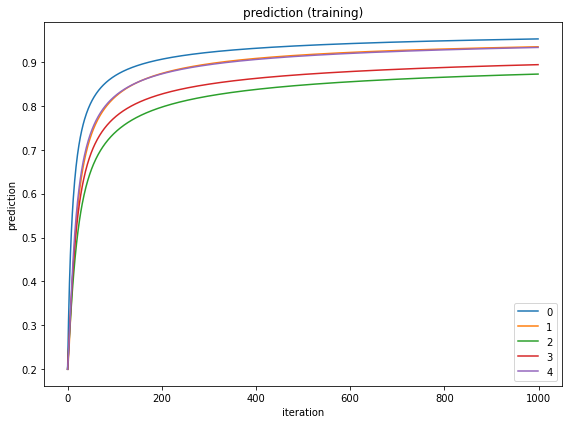


################################################################################
#
# RESULT # 06
#
################################################################################



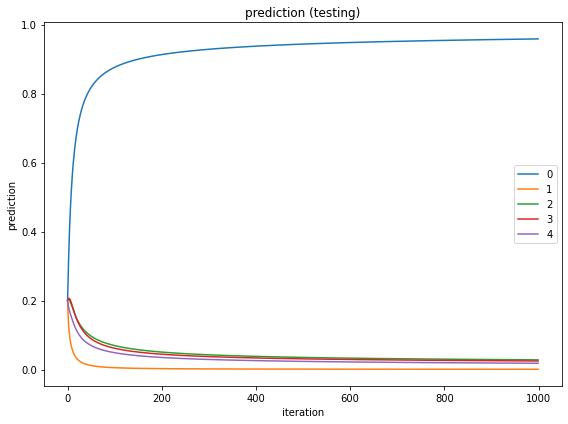


################################################################################
#
# RESULT # 07
#
################################################################################

final training loss = 0.13488

################################################################################
#
# RESULT # 08
#
################################################################################

final testing loss = 0.11646

################################################################################
#
# RESULT # 09
#
################################################################################

final training accuracy = 0.00000

################################################################################
#
# RESULT # 10
#
################################################################################

final testing accuracy = 0.00000


In [309]:
number_result = 10 

for i in range(number_result):

    title           = '# RESULT # {:02d}'.format(i+1) 
    name_function   = 'function_result_{:02d}()'.format(i+1)

    print('') 
    print('################################################################################')
    print('#') 
    print(title)
    print('#') 
    print('################################################################################')
    print('') 

    eval(name_function)